In [1]:
from pandas import DataFrame, read_csv, Series
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
inf = np.inf

**Reading data from [selected study github](https://github.com/CSSLab/social-dimensions/tree/main)**

In [2]:
community_scores = read_csv('reddit_scores.csv')

In [3]:
partisan = Series(community_scores['partisan'].values, index=community_scores['community'])
partisan.sort_values()

community
democrats               -0.345949
EnoughLibertarianSpam   -0.322595
hillaryclinton          -0.302793
progressive             -0.299471
BlueMidterm2018         -0.297783
                           ...   
Mr_Trump                 0.289561
NoFapChristians          0.293437
TrueChristian            0.314246
The_Donald               0.335132
Conservative             0.444171
Length: 10006, dtype: float64

**Displaying distribution of original values and norm**

In [19]:
def describe(inp, df, title=None):
    fig = plt.figure(figsize=(13, 3))
    plt.suptitle(title)
    gs = fig.add_gridspec(1, 2, hspace=.2, wspace=.1)
    (ax1, ax2) = gs.subplots()
        
    mean = np.mean(inp)
    std = np.std(inp)
    ax1.hist(inp, bins=250)
    
    df.loc[len(df)] = [mean, std, len(inp[inp < 0]), len(inp[inp >= 0])] + [len(inp[(inp > a * std + mean) & (inp <= b * std + mean)]) for a, b in [(-inf, -3), (-3, -2), (-2, -1), (-1, 1), (1, 2), (2, 3), (3, inf)]]
    ax2.bar(['far-left', 'left', 'left-lean', 'center', 'right-lean', 'right', 'far-right'], df.iloc[len(df)-1, 4:], log=True)
    if title: plt.savefig(f"./{title}", bbox_inches='tight')
    plt.show()


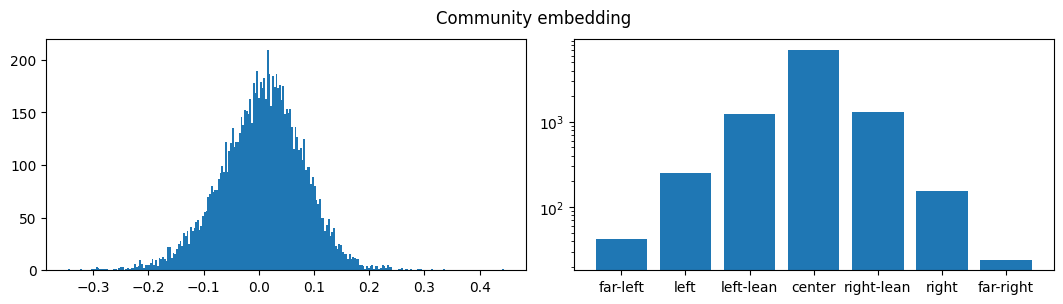

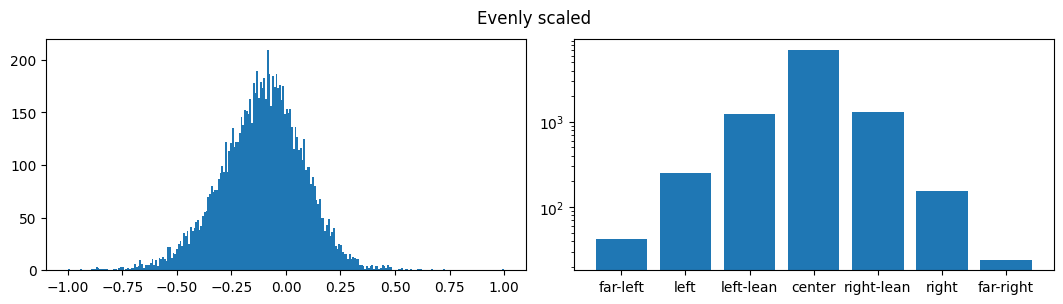

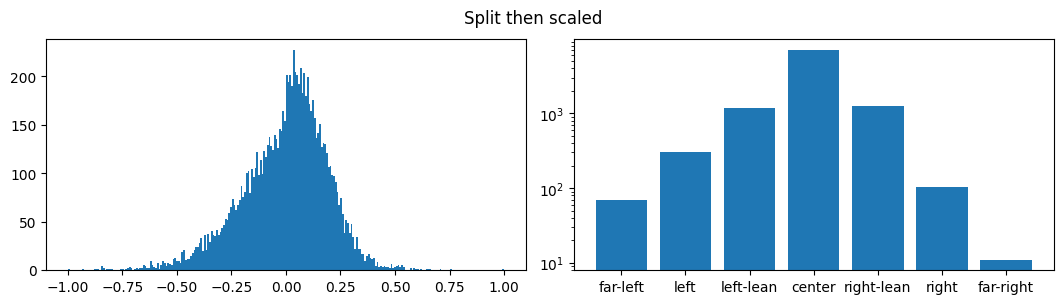

,mean,std.div,LOC,ROC,far-left,left,lean-left,center,lean-right,right,far-right
original,0.005711,0.075369,4476.0,5530.0,42.0,249.0,1228.0,7005.0,1306.0,152.0,24.0
scaled,-0.109857,0.190779,7199.0,2807.0,42.0,249.0,1228.0,7005.0,1306.0,152.0,24.0
split,-0.004245,0.194469,4476.0,5530.0,69.0,300.0,1171.0,7104.0,1246.0,105.0,11.0


In [5]:
df = DataFrame(columns=['mean', 'std.div', 'LOC', 'ROC', 'far-left', 'left', 'lean-left', 'center', 'lean-right', 'right', 'far-right'])
describe(partisan.values, df, "Community embedding")
scaled = Series(MinMaxScaler(feature_range=(-1, 1)).fit_transform(partisan.values.reshape(-1, 1)).flatten(), index=partisan.index)
describe(scaled, df, "Evenly scaled")
split = Series(np.vstack([
    MinMaxScaler(feature_range=(-1, 0)).fit_transform(partisan[partisan < 0].values.reshape(-1, 1)),
    MinMaxScaler(feature_range=(0, 1)).fit_transform(partisan[partisan >= 0].values.reshape(-1, 1)),
]).flatten(), index=partisan.index)
describe(split, df, "Split then scaled")
df = df.rename(index={0: 'original', 1: 'scaled', 2: 'split'})
df

**All sides data retrieved manually from [allsides.com](https://www.allsides.com/unbiased-balanced-news)**

In [6]:
allsides = DataFrame.from_dict({
 'Alternet': ['Left', -4.5, -2, ['alternet.org']],
 'ABC News': ['Lean Left', -2.4, -1, ['abcnews.go.com']],
 'Associated Press': ['Lean Left', -1.3, -1, ['apnews.com']],
 'The Epoch Times': ['Lean Right', 2.5, 1, ['theepochtimes.com']],
 'The Blaze': ['Right', 4.0, 1, ['theblaze.com']],
 'Buzzfeed': ['Left', -4.0, -2, ['buzzfeednews.com']],
 'The Atlantic': ['Left', -4.0, -2, ['theatlantic.com']],
 'Axios': ['Lean Left', -1.7, -1, ['axios.com']],
 'New York Post': ['Lean Right', 1.8, 1, ['nypost.com']],
 'Breitbart News': ['Right', 5, 2, ['breitbart.com']],
 'CNN': ['Lean Left', -1.2, -1, ['cnn.com']],
 'Bloomberg': ['Lean Left', -2.4, -1, ['bloomberg.com']],
 'The BBC': ['Center', -.8, 0, ['bbc.com', 'bbc.co.uk']],
 'Newsmax': ['Right', 4.0, 1, ['newsmax.com']],
 'The Daily Caller': ['Right', 3.8, 1, ['dailycaller.com']],
 'The Daily Beast': ['Left', -4.1, -2, ['thedailybeast.com']],
 'CBS News': ['Lean Left', -1.5, -1, ['cbsnews.com']],
 'CS Monitor': ['Center', -.3, 0, ['csmonitor.com']],
 'Reason': ['Lean Right', 1.8, 1, ['reason.com']],
 'The Daily Mail': ['Right', 4.0, 1, ['dailymail.co.uk']],
 'Democracy Now': ['Left', -4.0, -2, ['democracynow.org']],
 'The Economist': ['Lean Left', -1.4, -1, ['economist.com']],
 'Forbes': ['Center', -0.5, 0, ['forbes.com']],
 'Washington Examiner': ['Lean Right', 2.3, 1, ['washingtonexaminer.com']],
 'The Daily Wire': ['Right', 5.0, 1, ['dailywire.com']],
 'HuffPost': ['Left', -4.3, -2, ['huffpost.com']],
 'The Guardian': ['Lean Left', -2.4, -1, ['theguardian.com']],
 'The Hill': ['Center', -0.8, 0, ['thehill.com']],
 'Washington Times': ['Lean Right', 2.0, 1, ['washingtontimes.com']],
 'The Federalist': ['Right', 4.0, 1, ['thefederalist.com']],
 'The Intercept': ['Left', -3.6, -2, ['theintercept.com']],
 'NBC News': ['Lean Left', -1.8, -1, ['nbcnews.com']],
 'Newsweek': ['Center', -0.04, 0, ['newsweek.com']],
 'Fox News': ['Right', 3.1, 1, ['foxnews.com']],
 'Jacobin': ['Left', -4.0, -2, ['jacobinmag.com']],
 'The New York Times': ['Lean Left', -2.2, -1, ['nytimes.com']],
 'NPR': ['Lean Left', -2.0, -1, ['npr.org']],
 'Mother Jones': ['Left', -4.0, -2, ['motherjones.com']],
 'Politico': ['Lean Left', -1.2, -1, ['politico.com']],
 'Reuters': ['Center', -0.7, 0, ['reuters.com']],
 'National Review': ['Lean Right', 2.5, 1, ['nationalreview.com/news']],
 'MSN': ['Left', -5.7, -2, ['msnbc.com']], 
 'Time': ['Lean Left', -2.3, -1, ['time.com']],
 'Wall Street Journal': ['Center', -0.2, 0, ['wsj.com']],
 'One America News': ['Right', 3.1, 2, ['oann.com']],
 'The New Yorker': ['Left', -4.2, -2, ['newyorker.com']],
 'USA Today': ['Lean Left', -2.0, -1, ['usatoday.com']],
 'The Spectator': ['Right', 4, 2, ['thespectator.com']],
 'Slate': ['Left', -4.5, -2, ['slate.com']],
 'Washington Post': ['Lean Left', -2.2, -1, ['washingtonpost.com']],
 'Vox': ['Left', -3.5, -2, ['vox.com']]}, orient='index', columns=['Bias rating', 'All sides rating number', 'Partisan bias', 'URL'])
allsides

,Bias rating,All sides rating number,Partisan bias,URL
Alternet,Left,-4.50,-2,[alternet.org]
ABC News,Lean Left,-2.40,-1,[abcnews.go.com]
Associated Press,Lean Left,-1.30,-1,[apnews.com]
The Epoch Times,Lean Right,2.50,1,[theepochtimes.com]
The Blaze,Right,4.00,1,[theblaze.com]
Buzzfeed,Left,-4.00,-2,[buzzfeednews.com]
The Atlantic,Left,-4.00,-2,[theatlantic.com]
Axios,Lean Left,-1.70,-1,[axios.com]
New York Post,Lean Right,1.80,1,[nypost.com]
Breitbart News,Right,5.00,2,[breitbart.com]


**Displaying distribution of chosen news sources**

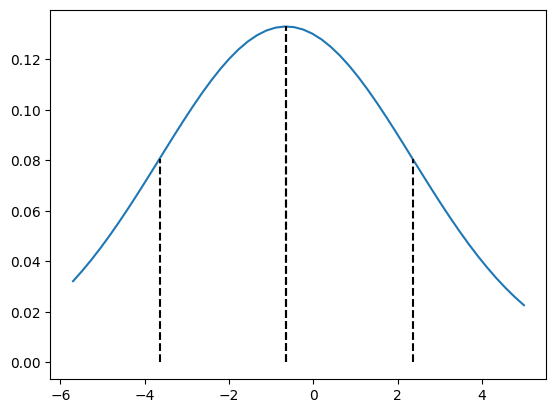

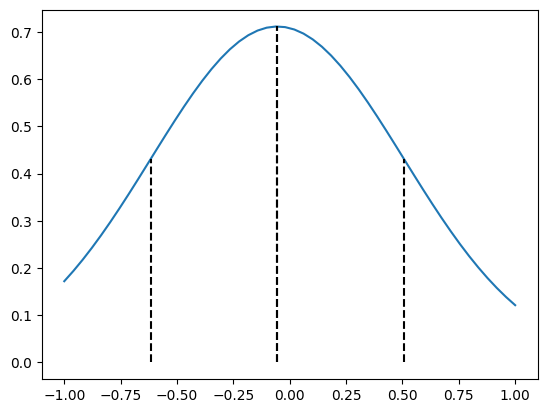

[-0.6439215686274509, -0.05493861095840195]


In [7]:
allsides['Scaled rating number'] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(allsides['All sides rating number'].values.reshape(-1, 1)).flatten()
means = []
for inp in [allsides['All sides rating number'].values, allsides['Scaled rating number'].values]:
    mean, std = norm.fit(inp)
    means.append(mean)
    x = np.linspace(inp.min(), inp.max())
    plt.plot(x, norm.pdf(x, loc=mean, scale=std))
    for i in range(2):
            plt.vlines(std*i + mean, 0, norm.pdf(std*i + mean, loc=mean, scale=std), linestyles='dashed', color='black')
            plt.vlines(std*-i + mean , 0, norm.pdf(std*-i + mean, loc=mean, scale=std), linestyles='dashed', color='black')
    plt.show()
print(means)    

**Reading post submissions data from [selected study github](https://github.com/CSSLab/social-dimensions/tree/main)**

In [8]:
submissions = read_csv('text_submissions.csv')
submissions = submissions[submissions['subreddit'].isin(partisan.index.values)]
linked = submissions[~submissions['is_self'].astype(bool)]
news = linked[linked['domain'].isin(np.hstack(allsides['URL'].values))]

/tmp/ipykernel_66075/1109939334.py:1: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions = read_csv('text_submissions.csv')


**Running calculations for study**

In [16]:
k = {url: i for i in allsides.index for url in allsides.loc[i, 'URL']}
news.loc[:,'source'] = news['domain'].apply(k.get)
news.loc[:,'rating'] = news['domain'].apply(lambda x: allsides.loc[k.get(x), 'All sides rating number'])
news.loc[:,'scaled rating'] = news['domain'].apply(lambda x: allsides.loc[k.get(x), 'Scaled rating number'])
news.loc[:,'original'] = news['subreddit'].apply(lambda x: partisan[x])
news.loc[:,'scaled'] = news['subreddit'].apply(lambda x: scaled[x])
news.loc[:,'split'] = news['subreddit'].apply(lambda x: split[x])

In [10]:
subreddits = DataFrame(index=news['subreddit'].unique())
sources = DataFrame(index=news['source'].unique())
for s in ['rating', 'scaled rating']:
    subreddits[s] = news.groupby('subreddit').apply(lambda x: x[s].sum()/ len(x[s]))
subreddits['original'] = partisan[subreddits.index.values]
subreddits['scaled'] = scaled[subreddits.index.values]
subreddits['split'] = split[subreddits.index.values]
for s in df.index.values:
    sources[s] = news.groupby('source').apply(lambda x: x[s].sum()/len(x[s]))
sources['Allsides'] = allsides['All sides rating number'][sources.index.values]
sources['Allsides scaled'] = allsides['Scaled rating number'][sources.index.values]

**Displaying distribution of news sources and subreddits biases**

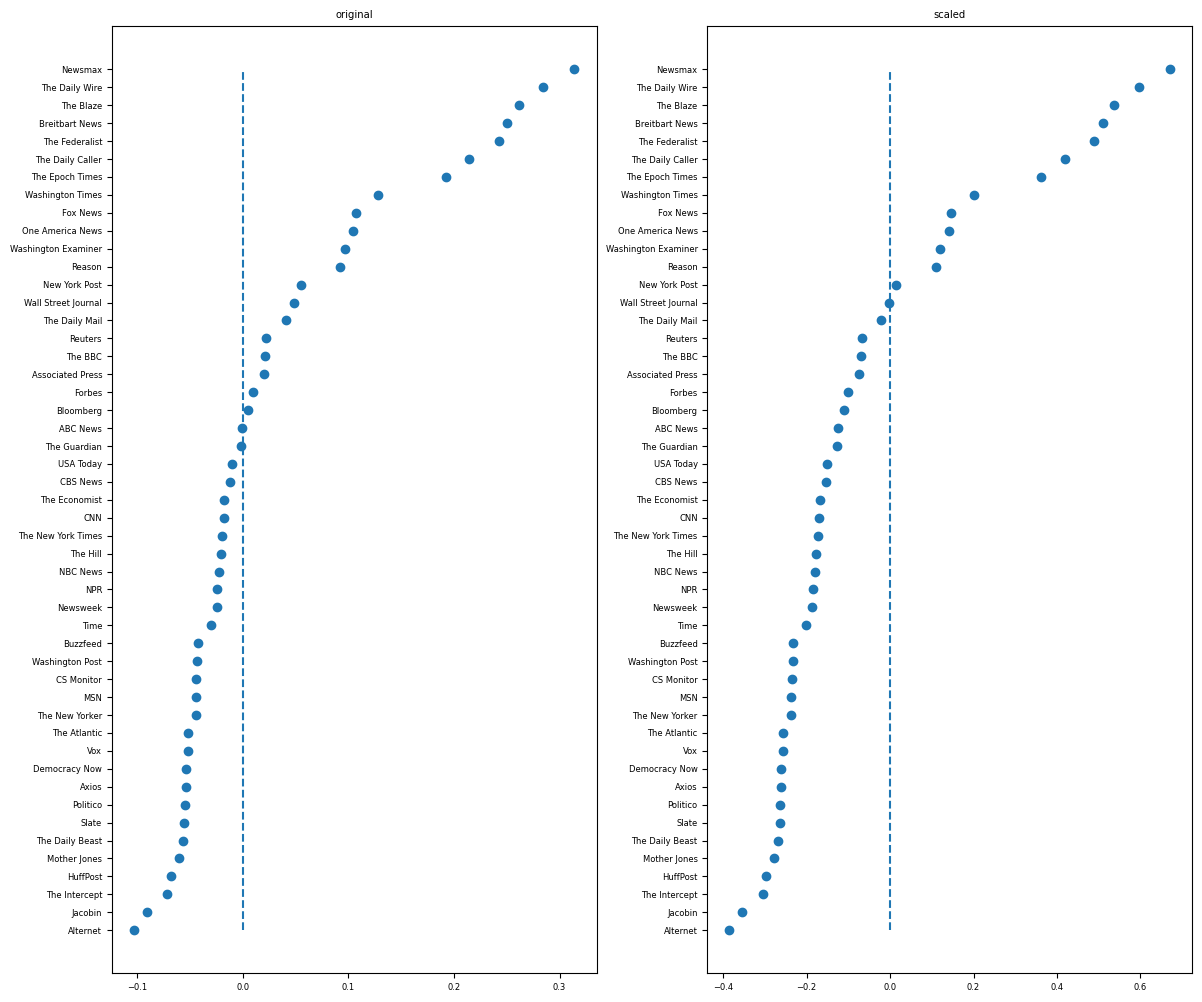

In [11]:
plt.rcParams.update({'font.size': 6})

fig, axs = plt.subplots(1, 2, figsize=(12, 10))
for s, ax in zip(['original', 'scaled'], axs):
    d = sources[s].sort_values()
    ax.title.set_text(s)
    ax.scatter(d.values, d.index.values)
    ax.vlines(0.0, d.idxmin(), d.idxmax(), linestyle='dashed')
plt.tight_layout()
plt.savefig("News ratings")

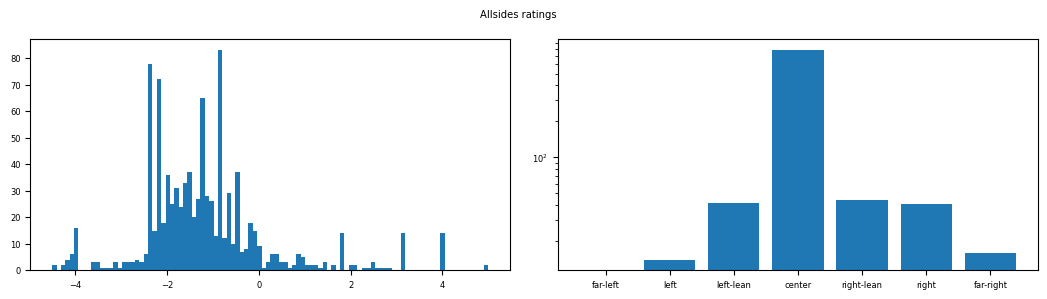

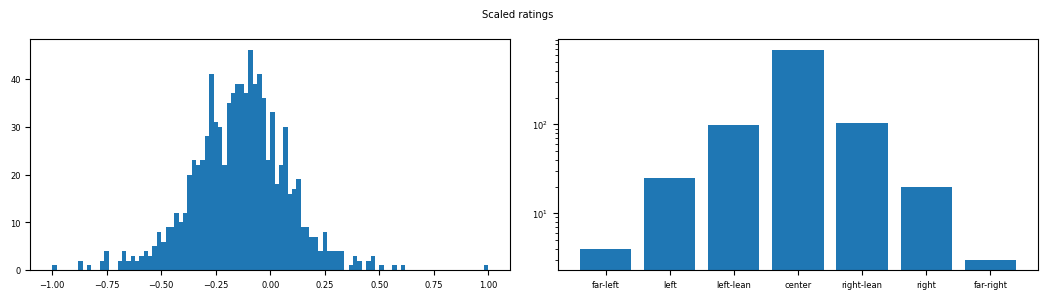

In [18]:
describe(subreddits['rating'], df, 'Allsides ratings')
describe(subreddits['scaled'], df, 'Scaled ratings')

In [13]:
df

,mean,std.div,LOC,ROC,far-left,left,lean-left,center,lean-right,right,far-right
original,0.005711,0.075369,4476.0,5530.0,42.0,249.0,1228.0,7005.0,1306.0,152.0,24.0
scaled,-0.109857,0.190779,7199.0,2807.0,42.0,249.0,1228.0,7005.0,1306.0,152.0,24.0
split,-0.004245,0.194469,4476.0,5530.0,69.0,300.0,1171.0,7104.0,1246.0,105.0,11.0
3,-1.168426,1.434888,837.0,109.0,0.0,14.0,42.0,789.0,44.0,41.0,16.0
4,-0.137423,0.218485,716.0,230.0,4.0,25.0,98.0,693.0,103.0,20.0,3.0


**Displaying predictive power of models**

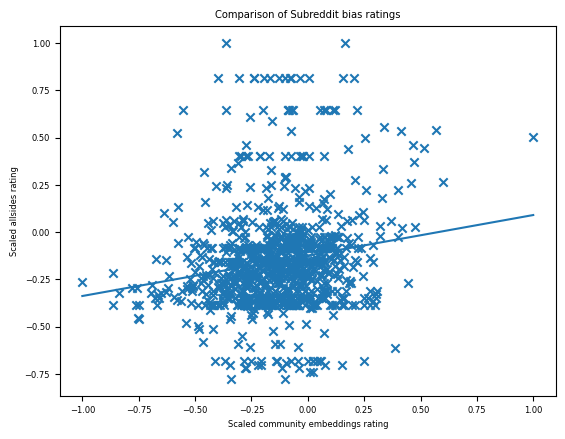

In [14]:
plt.scatter(subreddits['scaled'], subreddits['scaled rating'], marker='x')
plt.plot(np.arange(-1, 1.1, .1), LinearRegression().fit(
    subreddits['scaled'].values.reshape(-1, 1), 
    subreddits['scaled rating'].values.reshape(-1, 1)
).predict(np.arange(-1, 1.1, .1).reshape(-1, 1)))
plt.xlabel("Scaled community embeddings rating")
plt.ylabel("Scaled allsides rating")
plt.title("Comparison of Subreddit bias ratings")
plt.savefig("Comparison of Subreddit bias ratings")

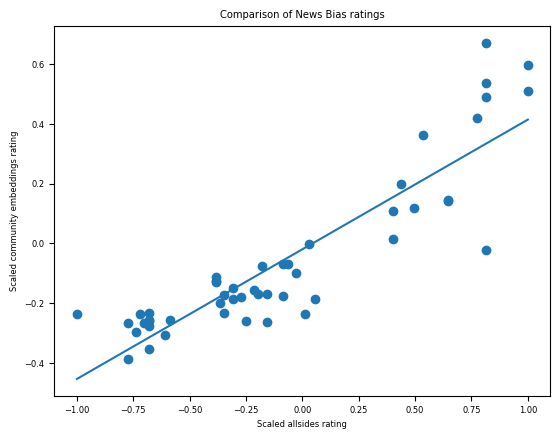

In [15]:
plt.scatter(sources['Allsides scaled'], sources['scaled'])
plt.plot(np.arange(-1, 1.1, .1), LinearRegression().fit(
    sources['Allsides scaled'].values.reshape(-1, 1), 
    sources['scaled'].values.reshape(-1, 1)
).predict(np.arange(-1, 1.1, .1).reshape(-1, 1)))
plt.xlabel("Scaled allsides rating")
plt.ylabel("Scaled community embeddings rating")
plt.title("Comparison of News Bias ratings")
plt.savefig("Comparison of News Bias ratings")